In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ข้อมูลตัวอย่าง
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
y = np.array([2, 4, 5, 4, 5])

# สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X, y)

# ทำนายค่า
y_pred = model.predict(X)

# คำนวณ Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

# แสดงกราฟ
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.legend()
plt.show()

# Get the coefficients
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

# Equation of the line
print(f"Equation: y = {m:.2f}x + {c:.2f}")


ModuleNotFoundError: No module named 'matplotlib'

In [16]:
model.predict([[10],[9]])

array([8.2, 7.6])

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# ข้อมูลสมมติ
data = {
    "Distance": [10, 20, 15, 25, 30],
    "Order_Volume": [2, 5, 3, 7, 10],
    "Delivery_Time": [1.5, 3.0, 2.0, 4.5, 5.5]
}
df = pd.DataFrame(data)

# แยกตัวแปรต้นและตัวแปรเป้าหมาย
X = df[["Distance", "Order_Volume"]]  # ตัวแปรต้น
y = df["Delivery_Time"]  # ตัวแปรเป้าหมาย

# แบ่งข้อมูลออกเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# สร้างโมเดล Linear Regression
model = LinearRegression()

# ฝึกโมเดลด้วยชุดข้อมูลฝึก
model.fit(X_train, y_train)

# บันทึกโมเดล
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved as 'linear_regression_model.pkl'")

# ทำนายผลจากชุดข้อมูลทดสอบ
y_pred = model.predict(X_test)

# ประเมินผลโมเดล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# แสดงสมการของเส้นตรง
print(f"Equation: Delivery_Time = {model.coef_[0]:.2f} * Distance + {model.coef_[1]:.2f} * Order_Volume + {model.intercept_:.2f}")


Model saved as 'linear_regression_model.pkl'
Mean Squared Error (MSE): 0.14946666666666666
R² Score: 0.9310153846153846
Equation: Delivery_Time = 0.18 * Distance + 0.06 * Order_Volume + -0.42


In [2]:
import numpy as np
import joblib

# โหลดโมเดล
model = joblib.load("linear_regression_model.pkl")

# ทำนายเวลาจัดส่งสำหรับข้อมูลใหม่
X = np.array([[18, 4]])  # Distance = 18 km, Order Volume = 4
predicted_time = model.predict(X)
print(f"Predicted Delivery Time: {predicted_time[0]:.2f} hours")


Predicted Delivery Time: 3.06 hours


c:\Users\User\promhod-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


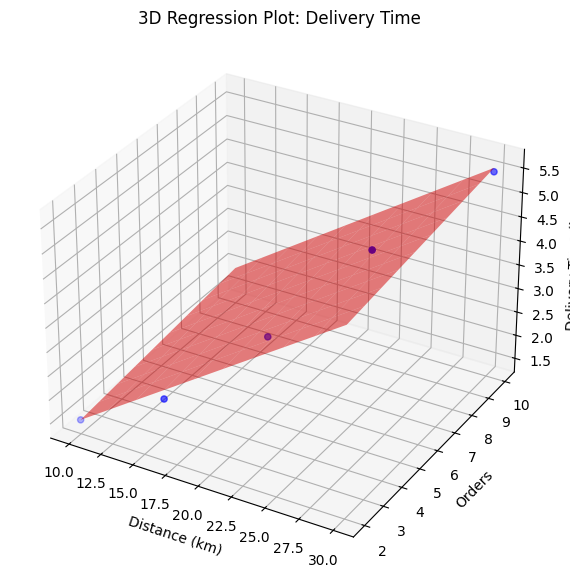

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# เตรียมข้อมูลสำหรับ Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Distance"], df["Order_Volume"], df["Delivery_Time"], color="blue", label="Actual Data")

# Plot ระนาบของ Regression
xx, yy = np.meshgrid(
    np.linspace(df["Distance"].min(), df["Distance"].max(), 10),
    np.linspace(df["Order_Volume"].min(), df["Order_Volume"].max(), 10)
)
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy
ax.plot_surface(xx, yy, zz, alpha=0.5, color="red", label="Regression Plane")

ax.set_xlabel("Distance (km)")
ax.set_ylabel("Orders")
ax.set_zlabel("Delivery Time (hours)")
ax.set_title("3D Regression Plot: Delivery Time")
plt.show()
